<a href="https://colab.research.google.com/github/SIDDHESH-8213/Data-Analysis/blob/main/Bitcoin_historical_Data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importing libraries



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

print("Libraries are successfully imported")

Libraries are successfully imported


### Importing the dataset

In [ ]:
! pip install kaggle

In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download -d mczielinski/bitcoin-historical-data

 96% 96.0M/100M [00:00<00:00, 132MB/s]
100% 100M/100M [00:00<00:00, 147MB/s] 


In [ ]:
! unzip bitcoin-historical-data.zip

Archive:  bitcoin-historical-data.zip
  inflating: bitstampUSD_1-min_data_2012-01-01_to_2021-03-31.csv  


### Overview of the dataset

- There are 8 Columns in the dataset 
- Around 4.9 million entries

In [ ]:
btc_df = pd.read_csv("bitcoin-data.csv")

In [ ]:
btc_df.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
1,1325317980,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1325318040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1325318100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1325318160,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
btc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4857377 entries, 0 to 4857376
Data columns (total 8 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Timestamp          int64  
 1   Open               float64
 2   High               float64
 3   Low                float64
 4   Close              float64
 5   Volume_(BTC)       float64
 6   Volume_(Currency)  float64
 7   Weighted_Price     float64
dtypes: float64(7), int64(1)
memory usage: 296.5 MB


In [ ]:
btc_df.columns

Index(['Timestamp', 'Open', 'High', 'Low', 'Close', 'Volume_(BTC)',
       'Volume_(Currency)', 'Weighted_Price'],
      dtype='object')

In [ ]:
btc_df.describe()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
count,4.857377e+06,3.613769e+06,3.613769e+06,3.613769e+06,3.613769e+06,3.613769e+06,3.613769e+06,3.613769e+06
mean,1.471301e+09,6.009024e+03,6.013357e+03,6.004488e+03,6.009014e+03,9.323249e+00,4.176284e+04,6.008935e+03
std,8.428019e+07,8.996247e+03,9.003521e+03,8.988778e+03,8.996360e+03,3.054989e+01,1.518248e+05,8.995992e+03
min,1.325318e+09,3.800000e+00,3.800000e+00,1.500000e+00,1.500000e+00,0.000000e+00,0.000000e+00,3.800000e+00
25%,1.398179e+09,4.438600e+02,4.440000e+02,4.435200e+02,4.438600e+02,4.097759e-01,4.521422e+02,4.438306e+02
50%,1.471428e+09,3.596970e+03,3.598190e+03,3.595620e+03,3.597000e+03,1.979811e+00,3.810124e+03,3.596804e+03
75%,1.544288e+09,8.627270e+03,8.632980e+03,8.621090e+03,8.627160e+03,7.278216e+00,2.569821e+04,8.627637e+03
max,1.617149e+09,6.176356e+04,6.178183e+04,6.167355e+04,6.178180e+04,5.853852e+03,1.390067e+07,6.171621e+04


### Cleaning the dataset

In [ ]:
a = btc_df.isna().sum()
a
# Around 1.2 million entries are Nan 
# We will remove records having Nan entries

Timestamp                  0
Open                 1243608
High                 1243608
Low                  1243608
Close                1243608
Volume_(BTC)         1243608
Volume_(Currency)    1243608
Weighted_Price       1243608
dtype: int64

In [ ]:
(a["Open"] / len(btc_df.index) ) * 100
# 25 % of the records are Nan

25.602459928475803

In [ ]:
btc_df.dropna(inplace = True) #Dropped null values

In [ ]:
# Checking for any duplicate values in Timestamp column

duplicate = btc_df[btc_df.duplicated()]
duplicate

# There are no duplicate entries



,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price


In [ ]:
# Let's check for duplicate in Timestamp field

duplicate_2 = btc_df[btc_df.duplicated("Timestamp")]
duplicate_2

# There are no duplicates in Timestamp column

### Data Processing

### Converting the timestamp to date-time format

In [ ]:
btc_df["Time-Stamp"] = pd.to_datetime(btc_df["Timestamp"], unit = 's')

In [ ]:
btc_df.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,Time-Stamp
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000,2011-12-31 07:52:00
478,1325346600,4.39,4.39,4.39,4.39,48.000000,210.720000,4.390000,2011-12-31 15:50:00
547,1325350740,4.50,4.57,4.50,4.57,37.862297,171.380338,4.526411,2011-12-31 16:59:00
548,1325350800,4.58,4.58,4.58,4.58,9.000000,41.220000,4.580000,2011-12-31 17:00:00
1224,1325391360,4.58,4.58,4.58,4.58,1.502000,6.879160,4.580000,2012-01-01 04:16:00


In [ ]:
btc_df["Time-Stamp"].min()

Timestamp('2011-12-31 07:52:00')

In [ ]:
btc_df["Time-Stamp"].max()

Timestamp('2021-03-31 00:00:00')

### The time - range of the dataset we are studying is 2011-12-31 to 2021- 03 - 31

In [ ]:
# Dropping the Timestamp column
btc_df.drop("Timestamp",axis = 1, inplace = True)

In [ ]:
btc_df_2 = btc_df.groupby(pd.Grouper(key = "Time-Stamp", freq = "Y")).mean()
# Getting a dataset grouped by year

In [ ]:
btc_df_2

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
Time-Stamp,,,,,,,
2011-12-31,4.465000,4.482500,4.465000,4.482500,23.829470,106.330084,4.471603
2012-12-31,10.094570,10.097488,10.091053,10.093934,21.328197,216.485795,10.094143
2013-12-31,254.281420,254.658978,253.855315,254.264327,15.734087,4851.052777,254.242741
2014-12-31,527.132511,527.571308,526.679647,527.137609,12.617999,6568.182937,527.113071
2015-12-31,274.366745,274.509271,274.208588,274.364343,14.823699,4146.228635,274.353829
2016-12-31,558.906222,559.088461,558.701291,558.905550,5.658247,3159.519900,558.890451
2017-12-31,4155.221695,4159.353798,4150.157998,4155.146585,9.721584,45053.550037,4154.759504
2018-12-31,7576.803839,7582.514112,7570.686577,7576.778120,7.774885,60791.446371,7576.505596
2019-12-31,7427.136604,7431.551337,7422.596721,7426.850617,5.890939,45557.178460,7427.214436


### Setting Time-Stamp as index

In [ ]:
btc_df.set_index("Time-Stamp", inplace = True)

In [ ]:
btc_df.head()

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
Time-Stamp,,,,,,,
2011-12-31 07:52:00,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000
2011-12-31 15:50:00,4.39,4.39,4.39,4.39,48.000000,210.720000,4.390000
2011-12-31 16:59:00,4.50,4.57,4.50,4.57,37.862297,171.380338,4.526411
2011-12-31 17:00:00,4.58,4.58,4.58,4.58,9.000000,41.220000,4.580000
2012-01-01 04:16:00,4.58,4.58,4.58,4.58,1.502000,6.879160,4.580000


In [ ]:
btc_df["Close - Open"] = btc_df["Close"] - btc_df["Open"]
# if the value is > 0, then there is rise in the value
btc_df["(Close - Open) percentage"] = (btc_df["Close - Open"] / btc_df['Open']) * 100 

In [ ]:
btc_df.head()

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,Close - Open,(Close - Open) percentage
Time-Stamp,,,,,,,,,
2011-12-31 07:52:00,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000,0.00,0.000000
2011-12-31 15:50:00,4.39,4.39,4.39,4.39,48.000000,210.720000,4.390000,0.00,0.000000
2011-12-31 16:59:00,4.50,4.57,4.50,4.57,37.862297,171.380338,4.526411,0.07,1.555556
2011-12-31 17:00:00,4.58,4.58,4.58,4.58,9.000000,41.220000,4.580000,0.00,0.000000
2012-01-01 04:16:00,4.58,4.58,4.58,4.58,1.502000,6.879160,4.580000,0.00,0.000000


In [ ]:
btc_df.mean()

Open                          6009.023680
High                          6013.357082
Low                           6004.488004
Close                         6009.013545
Volume_(BTC)                     9.323249
Volume_(Currency)            41762.842397
Weighted_Price                6008.934800
Close - Open                    -0.010135
(Close - Open) percentage       -0.000793
dtype: float64

### Analysis

### What is the variation observed in Open / Close price of btc

In [ ]:
from matplotlib.pyplot import figure

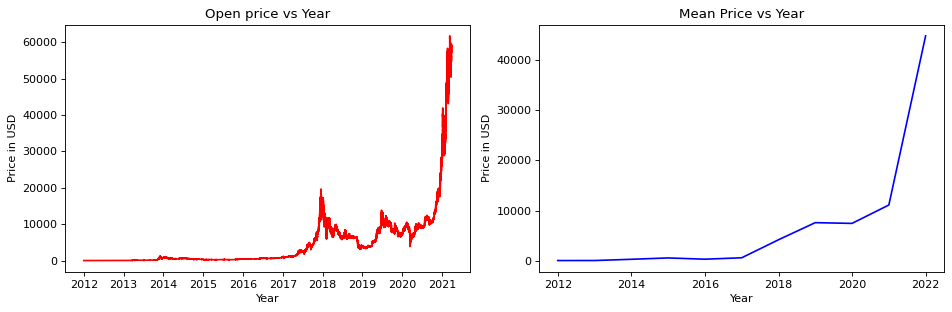

In [ ]:
figure(figsize = (12,4), dpi = 80)
plt.subplot(1,2,1)
plt.plot(btc_df["Open"], color = "r")
plt.xlabel("Year")
plt.ylabel("Price in USD")
plt.title("Open price vs Year")
plt.tight_layout()

plt.subplot(1,2,2)
plt.plot(btc_df_2["Open"], color = "b")
plt.title("Mean Price vs Year")
plt.xlabel("Year")
plt.ylabel("Price in USD")
plt.tight_layout()

1.  The btc price has increased over the years
2.  The maximum rise was seen in late 2020 and early 2021 
3.  Mean price was stable till 2017 after which it has increased and reached maximum in 2021
4. There was a sudden rise in btc price in late 2017. It was called " 2017 boom and 2018 crash"  For more info : https://en.wikipedia.org/wiki/Cryptocurrency_bubble#2017_boom_and_2018_crash


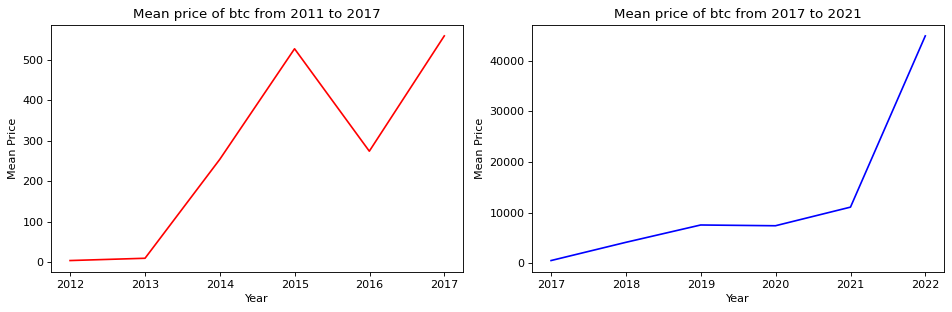

In [ ]:
figure(figsize = (12,4), dpi = 80)
plt.subplot(1,2,1)
plt.plot(btc_df_2[btc_df_2.index < "2017"]["Open"] , color = "r" )
plt.xlabel("Year")
plt.ylabel("Mean Price")
plt.title("Mean price of btc from 2011 to 2017")
plt.tight_layout()

plt.subplot(1,2,2)
plt.plot(btc_df_2[btc_df_2.index > "2016"]["Open"], color = "b")
plt.xlabel("Year")
plt.ylabel("Mean Price")
plt.title("Mean price of btc from 2017 to 2021")
plt.tight_layout()


1. In 2013, btc experienced highest ever jump, going from $10 to $254 and to around $524 in 2014 
2. In 2017-2018, btc was unstable, due to boom and crash
3. After 2019, btc price is increasing continuously, with little drop in early 2020 due to pandemic. For more info : https://en.wikipedia.org/wiki/Cryptocurrency_bubble#2021_boom



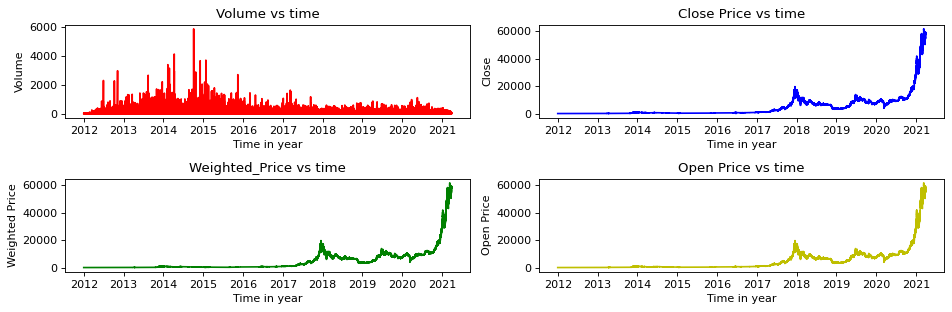

In [ ]:
figure(figsize=(12,4), dpi = 80)
plt.subplot(2,2,1)
plt.plot(btc_df["Volume_(BTC)"], color = "r")
plt.title("Volume vs time")
plt.xlabel("Time in year")
plt.ylabel("Volume")
plt.tight_layout()

plt.subplot(2,2,2)
plt.plot(btc_df["Close"], color = "b")
plt.title("Close Price vs time")
plt.xlabel("Time in year")
plt.ylabel("Close")
plt.tight_layout()

plt.subplot(2,2,3)
plt.plot(btc_df["Weighted_Price"], color = "g")
plt.title("Weighted_Price vs time")
plt.xlabel("Time in year")
plt.ylabel("Weighted Price")
plt.tight_layout()

plt.subplot(2,2,4)
plt.plot(btc_df["Open"], color = "y")
plt.title("Open Price vs time")
plt.xlabel("Time in year")
plt.ylabel("Open Price")
plt.tight_layout()


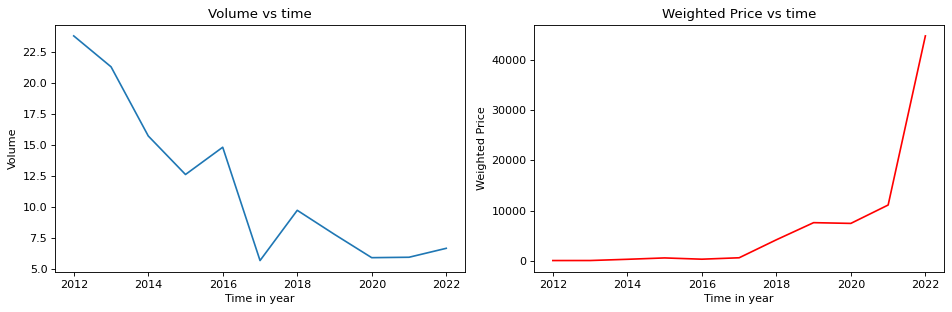

In [ ]:
figure(figsize=(12,4), dpi = 80)
plt.subplot(1,2,1)
plt.plot(btc_df_2["Volume_(BTC)"])
plt.title("Volume vs time")
plt.xlabel("Time in year")
plt.ylabel("Volume")
plt.tight_layout()

plt.subplot(1,2,2)
plt.plot(btc_df_2["Weighted_Price"], color = "r")
plt.title("Weighted Price vs time")
plt.xlabel("Time in year")
plt.ylabel("Weighted Price")
plt.tight_layout()